##Rollno : 1203
##Name : Swaraj Bhalerao

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [ ]:
#importing dataset
dataset=pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')
dataset

FileNotFoundError: ignored

In [ ]:
#display number of rows and columns
dataset.shape

(400, 5)

In [ ]:
#display columns
dataset.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
#dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
#describe data
dataset.describe()

<bound method NDFrame.describe of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [ ]:
dataset.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


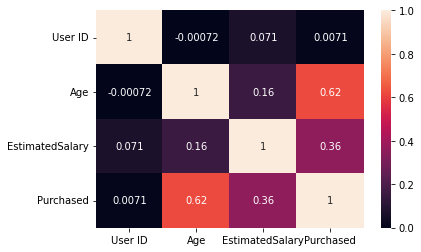

In [ ]:
import seaborn as sn
sn.heatmap(dataset.corr() , annot=True)

In [ ]:
dataset.Purchased.unique()

array([0, 1])

In [ ]:
x=dataset.iloc[:,[2,3]].values  #Age,estimated salary
y=dataset.iloc[:,4].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
logreg= LogisticRegression(random_state=0)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
#predicting 
y_pred=logreg.predict(X_test)

In [ ]:
#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[52  6]
 [11 31]]


##Precion

In [ ]:
precision = cm[0,0]/(cm[0,0]+cm[1,0])
print(precision)

0.8253968253968254


In [ ]:
recall=cm[0,0]/(cm[0,0]+cm[0,1])
print(recall)

0.896551724137931


In [ ]:
accuracy=(cm[0,0]+cm[1,1])/cm.sum()
print(accuracy)

0.83


In [ ]:
y_train_pred=logreg.predict(X_train)

In [ ]:
cm=confusion_matrix(y_train,y_train_pred)
print(cm)

[[185  14]
 [ 33  68]]


In [ ]:
precision = cm[0,0]/(cm[0,0]+cm[1,0])
print(precision)

0.8486238532110092


In [ ]:
recall=cm[0,0]/(cm[0,0]+cm[0,1])
print(recall)

0.9296482412060302


In [ ]:
accuracy=(cm[0,0]+cm[1,1])/cm.sum()
print(accuracy)

0.8433333333333334


In [ ]:
from sklearn.metrics import accuracy_score
print("Testing Accuracy="+str(accuracy_score(y_test,y_pred)))
print("Training Accuracy="+str(accuracy_score(y_train,y_train_pred)))

Testing Accuracy=0.83
Training Accuracy=0.8433333333333334


##Log Loss

In [ ]:
from sklearn.metrics import log_loss
print("Log loss Testing :" , log_loss(y_test,y_pred))
print("Log loss Training :" , log_loss(y_train,y_train_pred))



Log loss Testing : 5.871639962980628
Log loss Training : 5.411112283082749


##Parameter tuning

In [ ]:
#make dictionary of hyper parameters
param_grid ={'C':[0.5,0.8,1.0],
             'multi_class':['auto','ovr','multinomial'],
             'solver':['newton-cg','lbfgs','libliner','sag','saga']}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid= GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=3)

grid.fit(X_train,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END C=0.5, multi_class=auto, solver=newton-cg;, score=0.817 total time=   0.0s
[CV 2/5] END C=0.5, multi_class=auto, solver=newton-cg;, score=0.850 total time=   0.0s
[CV 3/5] END C=0.5, multi_class=auto, solver=newton-cg;, score=0.817 total time=   0.0s
[CV 4/5] END C=0.5, multi_class=auto, solver=newton-cg;, score=0.850 total time=   0.0s
[CV 5/5] END C=0.5, multi_class=auto, solver=newton-cg;, score=0.850 total time=   0.0s
[CV 1/5] END C=0.5, multi_class=auto, solver=lbfgs;, score=0.817 total time=   0.0s
[CV 2/5] END C=0.5, multi_class=auto, solver=lbfgs;, score=0.850 total time=   0.0s
[CV 3/5] END C=0.5, multi_class=auto, solver=lbfgs;, score=0.817 total time=   0.0s
[CV 4/5] END C=0.5, multi_class=auto, solver=lbfgs;, score=0.850 total time=   0.0s
[CV 5/5] END C=0.5, multi_class=auto, solver=lbfgs;, score=0.850 total time=   0.0s
[CV 1/5] END C=0.5, multi_class=auto, solver=libliner;, score=nan total time= 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
45 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 436, in _check_solver
    % (all_solvers, solver)
ValueError: L

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.5, 0.8, 1.0],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'libliner', 'sag',
                                    'saga']},
             verbose=3)

In [ ]:
print(grid.best_params_)

{'C': 0.8, 'multi_class': 'multinomial', 'solver': 'newton-cg'}


In [ ]:
print(grid.best_estimator_)

LogisticRegression(C=0.8, multi_class='multinomial', solver='newton-cg')


In [ ]:
print('Logistic Regression',LogisticRegression(C=0.8, multi_class='multinomial', solver='newton-cg'),)